In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Dataset

yelp_df = pd.read_csv('yelp.csv')
yelp_df.head(5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [3]:
yelp_df.shape

(10000, 10)

In [4]:
yelp_df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [5]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [6]:
yelp_df['text'].head(2)

0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
Name: text, dtype: object

# Visualize the Dataset

In [7]:
# Count the length of the review and add the length to a new column 'length'

yelp_df['length'] = yelp_df['text'].apply(len)

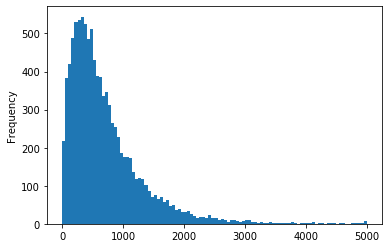

In [8]:
# View frequencies of review length in histogram

yelp_df['length'].plot(bins = 100, kind = 'hist')

In [9]:
yelp_df.length.describe()

count    10000.000000
mean       710.738700
std        617.399827
min          1.000000
25%        294.000000
50%        541.500000
75%        930.000000
max       4997.000000
Name: length, dtype: float64

In [10]:
print(yelp_df.text[yelp_df.length == yelp_df.length.max()])

55    In our continuing quest to identify cool, loca...
Name: text, dtype: object


In [11]:
# OR

yelp_df[yelp_df['length'] == yelp_df.length.max()]['text'].iloc[0]

'In our continuing quest to identify cool, locally owned places to eat and/or drink, Caroline and I auditioned Vintage 95 last night. \n\nBefore I go further, understand that whenever I go out for eats or drinks, I have  in  mind a Platonic Ideal of the Bar/Pub/Eatery I most want to frequent. I\'m on a constant quest to find that  Ideal expressed in Real Life. \n\nVintage 95 isn\'t quite there, but it\'s damn close. If I ever give something Five Stars, you\'ll know it has pegged my Platonic Ideal. Anyway...\n\nThe plan last night was for drinks. No plans for food, just Adult Beverages and warm conversation. But it turned into more.\n\nThe location in downtown Chandler is terrific for us. The owners have created a very fine visual experience - leather, stone, dark woods, good lighting. And they don\'t have the music turned up so loud that you CANNOT HAVE A CONVERSATION. This is one of my pet peeves. If I want to stare at people move their mouths while enduring an aural assault, I\'ll st

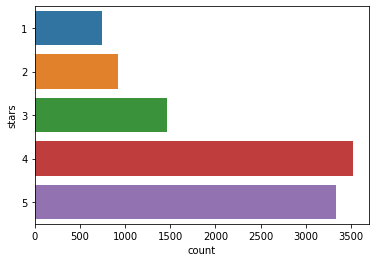

In [12]:
sns.countplot(y = 'stars', data = yelp_df)

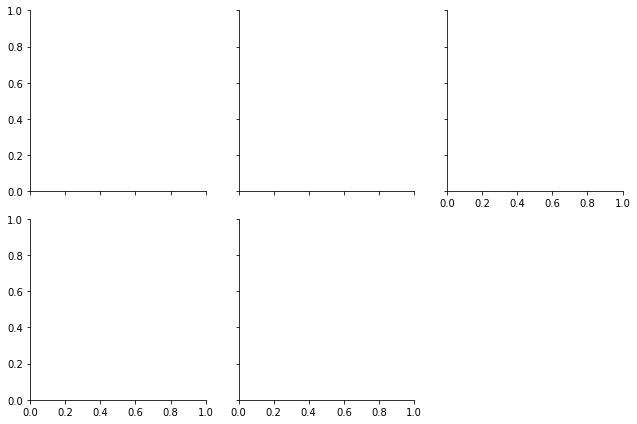

In [13]:
g = sns.FacetGrid(data = yelp_df, col = 'stars', col_wrap=3)

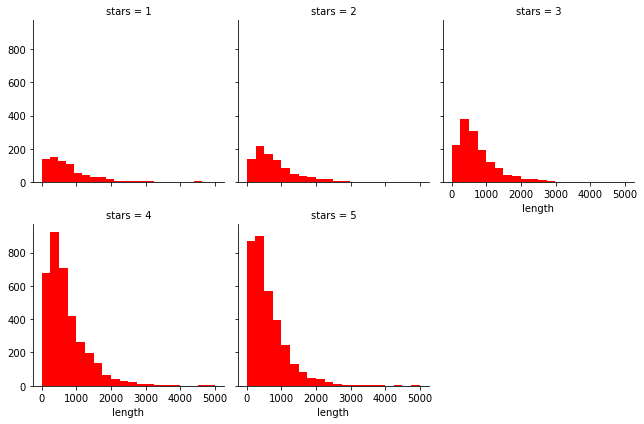

In [14]:
# Viewing histogram for each stars separately

g = sns.FacetGrid(data = yelp_df, col = 'stars', col_wrap=3)
g.map(plt.hist, 'length', bins = 20, color = 'r')

In [15]:
# Analysing very happy and very unhappy customers

yelp_df_1 = yelp_df[yelp_df['stars'] == 1]
yelp_df_5 = yelp_df[yelp_df['stars'] == 5]
yelp_df_1

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,1198
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0,569
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2,498
...,...,...,...,...,...,...,...,...,...,...,...
9924,mhQCxOiqp03qnhGRTtPduw,2012-07-07,PCjnn__E8AzNa2kXFXxTHQ,1,Horrible service.,review,rvaJcf5OIY2So_pkoqDHLQ,0,1,0,17
9931,C_eWAEOvkHZ_IZYGwjtpmg,2011-04-25,QfdoE-XqEeCsttJH8g0ugQ,1,I love Saddle Ranch for its casual night time ...,review,yhGfcKunPjcy-v-1ppr6oQ,0,2,0,995
9953,QCxXYA13PtkD3wec47_r8Q,2012-03-14,V2N2TCqnaqMYfg7zXGG-Rg,1,"""Hipster,Trendy"" ????-I think NOT !!!! Very di...",review,JEQ6el2-tLtKJU6k_SpE-w,0,2,0,296
9984,wepFVY82q_tuDzG6lQjHWw,2012-02-12,spusZYROtBKw_5tv3gYm4Q,1,Went last night to Whore Foods to get basics t...,review,W7zmm1uzlyUkEqpSG7PlBw,0,1,2,1673


In [16]:
yelp_df_5

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565
...,...,...,...,...,...,...,...,...,...,...,...
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1,263
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0,908
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2,1326
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1,1968


In [17]:
yelp_df_1_5 = pd.concat([yelp_df_1, yelp_df_5])
yelp_df_1_5

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,1198
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0,569
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2,498
...,...,...,...,...,...,...,...,...,...,...,...
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1,263
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0,908
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2,1326
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1,1968


1 Star Percentage =  18.330885952031327 %
5 Star Percentage =  81.66911404796868 %


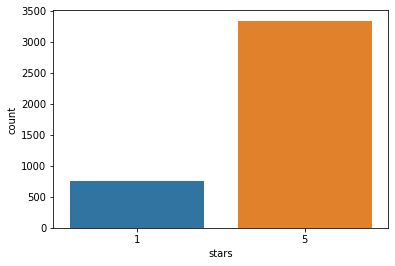

In [18]:
# Viewing Percentage of 1 and 5 stars rating - DATA IS IMBALANCED

print('1 Star Percentage = ', (len(yelp_df_1) / len(yelp_df_1_5) )* 100 , '%')
print('5 Star Percentage = ', (len(yelp_df_5) / len(yelp_df_1_5) )* 100 , '%')
sns.countplot(yelp_df_1_5['stars'])

# Data Cleaning 

In [19]:
# 1. Remove Punctuation

import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
Test = ' Hello Mr. Giri, I am so happy to learn AI now !!'
Test_punc_removed = [char  for char in Test if char not in string.punctuation]
Test_punc_removed

[' ',
 'H',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'M',
 'r',
 ' ',
 'G',
 'i',
 'r',
 'i',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 's',
 'o',
 ' ',
 'h',
 'a',
 'p',
 'p',
 'y',
 ' ',
 't',
 'o',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 ' ',
 'A',
 'I',
 ' ',
 'n',
 'o',
 'w',
 ' ']

In [21]:
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

' Hello Mr Giri I am so happy to learn AI now '

In [22]:
# Just trying with different characters to understand join

print('_'.join(Test_punc_removed) )

 _H_e_l_l_o_ _M_r_ _G_i_r_i_ _I_ _a_m_ _s_o_ _h_a_p_p_y_ _t_o_ _l_e_a_r_n_ _A_I_ _n_o_w_ 


In [23]:
# 2. Remove Stopwords

import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\girid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
from nltk.corpus import stopwords
stopwords.words('English')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
Test_punc_removed_join

' Hello Mr Giri I am so happy to learn AI now '

In [26]:
Test_punc_removed_join_clean = [ word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [27]:
Test_punc_removed_join_clean

['Hello', 'Mr', 'Giri', 'happy', 'learn', 'AI']

In [28]:
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations'

mini_challenge_punc_removed = [ char for char in mini_challenge if char not in string.punctuation]
mini_challenge_punc_removed_join = ''.join(mini_challenge_punc_removed)
mini_challenge_punc_stopwords_removed = [word for word in mini_challenge_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
mini_challenge_punc_stopwords_removed

['mini', 'challenge', 'teach', 'remove', 'stopwords', 'punctuations']

In [29]:
# 3. Count Vectorizer

sample_data = ['This is the first document.', 'This document is the second document.', 'And this is the third one.', 'Is this the first document?']

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [30]:
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


# Applying all the Data Cleaning steps to our Yelp Reviews dataset

In [31]:
# Creating a pipeline function - The one that cleans the input and returns it

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [32]:
yelp_df_clean = yelp_df_1_5['text'].apply(message_cleaning)

In [33]:
print("Cleaned : ", yelp_df_clean[0] , "\n \n \n Original : ", yelp_df_1_5['text'][0] )

Cleaned :  ['My', 'wife', 'took', 'birthday', 'breakfast', 'excellent', 'The', 'weather', 'perfect', 'made', 'sitting', 'outside', 'overlooking', 'grounds', 'absolute', 'pleasure', 'Our', 'waitress', 'excellent', 'food', 'arrived', 'quickly', 'semibusy', 'Saturday', 'morning', 'It', 'looked', 'like', 'place', 'fills', 'pretty', 'quickly', 'earlier', 'get', 'better', 'Do', 'favor', 'get', 'Bloody', 'Mary', 'It', 'phenomenal', 'simply', 'best', 'Ive', 'ever', 'Im', 'pretty', 'sure', 'use', 'ingredients', 'garden', 'blend', 'fresh', 'order', 'It', 'amazing', 'While', 'EVERYTHING', 'menu', 'looks', 'excellent', 'I', 'white', 'truffle', 'scrambled', 'eggs', 'vegetable', 'skillet', 'tasty', 'delicious', 'It', 'came', '2', 'pieces', 'griddled', 'bread', 'amazing', 'absolutely', 'made', 'meal', 'complete', 'It', 'best', 'toast', 'Ive', 'ever', 'Anyway', 'I', 'cant', 'wait', 'go', 'back'] 
 
 
 Original :  My wife took me here on my birthday for breakfast and it was excellent.  The weather was 

In [34]:
# Count Vectorizer

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = message_cleaning) # Doing data cleaning in a single step instead of running it separately
yelp_countvectorizer = vectorizer.fit_transform(yelp_df_1_5['text'])
print(yelp_countvectorizer.toarray())
print(yelp_countvectorizer.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(4086, 26639)


# Training the model with the entire Dataset

In [36]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
label = yelp_df_1_5['stars'].values
print(label)

[1 1 1 ... 5 5 5]


In [37]:
# Train the model

NB_classifier.fit(yelp_countvectorizer, label)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [38]:
# Testing the model

testing_sample_1 = ['amazing food! Highly recommended']
testing_sample_2 = ['shit food, made me sick']

testing_sample_1_countvectorizer = vectorizer.transform(testing_sample_1)
testing_sample_2_countvectorizer = vectorizer.transform(testing_sample_2)

test_1_predict = NB_classifier.predict(testing_sample_1_countvectorizer)
test_2_predict = NB_classifier.predict(testing_sample_2_countvectorizer)

print("Test 1 : ", test_1_predict, "Test 2 : ", test_2_predict)

Test 1 :  [5] Test 2 :  [1]


# Divide the Dataset into Training and Testing prior to Training

In [39]:
X = yelp_countvectorizer
y = label

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [41]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# Evaluate the model

In [42]:
from sklearn.metrics import confusion_matrix, classification_report
y_predict_train = NB_classifier.predict(X_train)
y_predict_train

array([5, 5, 1, ..., 5, 1, 5], dtype=int64)

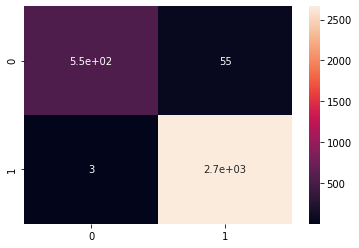

In [43]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

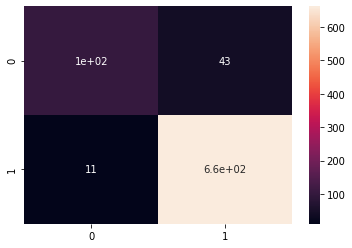

In [44]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [45]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           1       0.90      0.71      0.79       146
           5       0.94      0.98      0.96       672

    accuracy                           0.93       818
   macro avg       0.92      0.84      0.88       818
weighted avg       0.93      0.93      0.93       818



# Using TF-IDF to extract Features (In this case study, using TF-IDF results in terrible predictions of the model)

In [46]:
from sklearn.feature_extraction.text import TfidfTransformer
yelp_tfidf = TfidfTransformer().fit_transform(yelp_countvectorizer)
print(yelp_tfidf[:,:])

  (0, 26472)	0.07845931733732432
  (0, 26432)	0.09111321622477585
  (0, 26348)	0.06987878829143909
  (0, 26249)	0.1541615567047672
  (0, 25980)	0.05912194920739238
  (0, 25977)	0.11698290256181368
  (0, 25622)	0.14176867199044935
  (0, 25326)	0.2635264310357048
  (0, 25115)	0.14176867199044935
  (0, 24874)	0.12069531859987967
  (0, 24848)	0.12726992632317663
  (0, 24827)	0.04346564904009384
  (0, 24358)	0.05877392550229746
  (0, 23324)	0.09625672810545732
  (0, 22654)	0.09079246786149729
  (0, 22634)	0.10697744608921672
  (0, 22204)	0.0649368473543477
  (0, 22005)	0.12726992632317663
  (0, 20989)	0.08776603236057283
  (0, 19937)	0.14176867199044935
  (0, 19558)	0.09305549732376783
  (0, 19243)	0.12293100440844935
  (0, 19115)	0.11049445959959636
  (0, 19009)	0.10515765769236167
  (0, 18944)	0.08610165441398404
  :	:
  (4085, 14892)	0.134092535725749
  (4085, 14683)	0.08457323536396273
  (4085, 14626)	0.09992458688981794
  (4085, 13820)	0.19820884237219435
  (4085, 12417)	0.297379084020

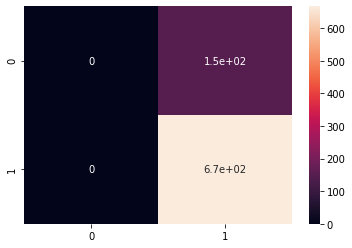

In [47]:
X = yelp_tfidf
y = label

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, classification_report
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)